## Setup

#### Packages


In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [219]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [194]:
data_path = "../data/raw/houses_Madrid.csv"

In [195]:
data = pd.read_csv(data_path,index_col = 0)

In [196]:
data.head()

,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [197]:
data.shape

(21742, 57)

In [198]:
data.columns

Index(['id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful', 'n_rooms',
       'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude', 'longitude',
       'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is

In [199]:
chop = data['neighborhood_id'].str.extract(r'Neighborhood (\d+): (.*?) \(.*\) - District (\d+): (.*)')
data['neighborhood']= chop[1]+ ' ' +chop[0]
data['District']= chop[3] + ' ' + chop[2]
data.drop(axis=1, columns=['neighborhood_id'], inplace=True)

In [200]:
#dropped columns which has no data or less data and which are not useful
columns_to_drop = [
    'id', 'title', 'sq_mt_useful', 'subtitle', 'n_floors', 'sq_mt_allotment', 'latitude', 'longitude', 'raw_address', 'is_exact_address_hidden', 
    'street_name', 'street_number', 'portal', 'floor', 'is_floor_under', 'has_storage_room', 'built_year',
    'door', 'rent_price', 'has_garden', 'has_pool', 'has_terrace', 'has_balcony', 'rent_price_by_area', 'operation', 'is_rent_price_known', 
    'is_buy_price_known', 'house_type_id', 'is_renewal_needed', 'is_furnished', 'is_kitchen_equipped',
    'is_new_development', 'are_pets_allowed', 'is_orientation_north', 'has_private_parking', 'has_public_parking',
    'is_orientation_west', 'is_orientation_south', 'is_orientation_east', 'is_accessible', 'has_green_zones', 'is_parking_included_in_price', 'parking_price'
]

In [201]:
data_cleaned = data.drop(columns=columns_to_drop)
data_cleaned.head()

,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,energy_certificate,has_parking,neighborhood,District
0,64.0,2,1.0,85000,1328,NaN,NaN,True,NaN,False,True,D,False,San Cristóbal 135,Villaverde 21
1,70.0,3,1.0,129900,1856,NaN,NaN,NaN,True,True,True,en trámite,False,Los Ángeles 132,Villaverde 21
2,94.0,2,2.0,144247,1535,False,True,NaN,True,True,True,no indicado,False,San Andrés 134,Villaverde 21
3,64.0,2,1.0,109900,1717,NaN,NaN,NaN,NaN,True,True,en trámite,False,San Andrés 134,Villaverde 21
4,108.0,2,2.0,260000,2407,NaN,NaN,True,True,True,True,en trámite,True,Los Rosales 133,Villaverde 21


In [202]:
data_cleaned.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price',
       'buy_price_by_area', 'has_central_heating', 'has_individual_heating',
       'has_ac', 'has_fitted_wardrobes', 'has_lift', 'is_exterior',
       'energy_certificate', 'has_parking', 'neighborhood', 'District'],
      dtype='object')

In [203]:
# Check for duplicates
duplicates = data_cleaned.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 732


In [204]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 0 to 21741
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sq_mt_built             21616 non-null  float64
 1   n_rooms                 21742 non-null  int64  
 2   n_bathrooms             21726 non-null  float64
 3   buy_price               21742 non-null  int64  
 4   buy_price_by_area       21742 non-null  int64  
 5   has_central_heating     13608 non-null  object 
 6   has_individual_heating  13608 non-null  object 
 7   has_ac                  11211 non-null  object 
 8   has_fitted_wardrobes    13399 non-null  object 
 9   has_lift                19356 non-null  object 
 10  is_exterior             18699 non-null  object 
 11  energy_certificate      21742 non-null  object 
 12  has_parking             21742 non-null  bool   
 13  neighborhood            21742 non-null  object 
 14  District                21742 non-null  obj

In [205]:
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned.shape

(21010, 15)

In [206]:
for column in data_cleaned.columns:
    print(f"Value counts for {column}:")
    print(data_cleaned[column].value_counts())
    print()

Value counts for sq_mt_built:
sq_mt_built
70.0     482
60.0     474
80.0     415
65.0     370
90.0     346
        ... 
770.0      1
764.0      1
489.0      1
978.0      1
427.0      1
Name: count, Length: 678, dtype: int64

Value counts for n_rooms:
n_rooms
3     6979
2     5283
4     3253
1     2200
5     1690
6      694
0      433
7      255
8      110
9       54
10      26
11      10
12       9
13       6
24       3
15       2
16       1
18       1
14       1
Name: count, dtype: int64

Value counts for n_bathrooms:
n_bathrooms
1.0     8818
2.0     7107
3.0     2350
4.0     1139
5.0      837
6.0      405
7.0      179
8.0       93
9.0       37
10.0      13
11.0       7
14.0       3
13.0       3
12.0       1
15.0       1
16.0       1
Name: count, dtype: int64

Value counts for buy_price:
buy_price
550000    150
135000    145
650000    139
175000    134
240000    134
         ... 
286410      1
156600      1
159999      1
163999      1
388000      1
Name: count, Length: 2403, dtype: in

In [207]:
cols_to_fill_Unknown = ['is_exterior', 'has_lift', 'has_individual_heating', 'has_central_heating']

for col in cols_to_fill_Unknown:
    data_cleaned[col] = data_cleaned[col].fillna('Unknown')

In [208]:
cols_to_fill_False = ['has_ac', 'has_fitted_wardrobes']

for col in cols_to_fill_False:
    data_cleaned[col] = data_cleaned[col].fillna('False')

In [209]:
data_cleaned.isna().sum()

sq_mt_built               125
n_rooms                     0
n_bathrooms                16
buy_price                   0
buy_price_by_area           0
has_central_heating         0
has_individual_heating      0
has_ac                      0
has_fitted_wardrobes        0
has_lift                    0
is_exterior                 0
energy_certificate          0
has_parking                 0
neighborhood                0
District                    0
dtype: int64

In [210]:
data_cleaned = data_cleaned.dropna(subset=['sq_mt_built', 'n_bathrooms'])

In [211]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20869 entries, 0 to 21741
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sq_mt_built             20869 non-null  float64
 1   n_rooms                 20869 non-null  int64  
 2   n_bathrooms             20869 non-null  float64
 3   buy_price               20869 non-null  int64  
 4   buy_price_by_area       20869 non-null  int64  
 5   has_central_heating     20869 non-null  object 
 6   has_individual_heating  20869 non-null  object 
 7   has_ac                  20869 non-null  object 
 8   has_fitted_wardrobes    20869 non-null  object 
 9   has_lift                20869 non-null  object 
 10  is_exterior             20869 non-null  object 
 11  energy_certificate      20869 non-null  object 
 12  has_parking             20869 non-null  bool   
 13  neighborhood            20869 non-null  object 
 14  District                20869 non-null  obj

In [226]:
# Mapping dictionary from Spanish to English for energy_certificate column
spanish_to_english = {
    'en trámite': 'in process',
    'no indicado': 'not indicated',
    'inmueble exento': 'exempt property'
}

# Replace values in the 'energy_certificate' column
data_cleaned['energy_certificate'] = data_cleaned['energy_certificate'].replace(spanish_to_english)

# Display the updated value counts
print(data_cleaned['energy_certificate'].value_counts())


energy_certificate
in process         10399
not indicated       3584
E                   2594
D                   1076
G                    875
F                    658
A                    590
C                    569
B                    432
exempt property       92
Name: count, dtype: int64


### Data Visualizations

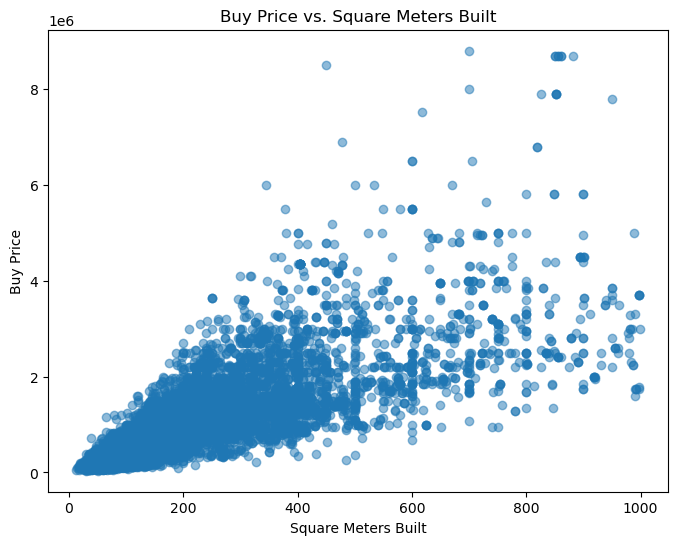

In [213]:
# Visualizations for 
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['sq_mt_built'], data_cleaned['buy_price'], alpha=0.5)
plt.title('Buy Price vs. Square Meters Built')
plt.xlabel('Square Meters Built')
plt.ylabel('Buy Price')
plt.show()

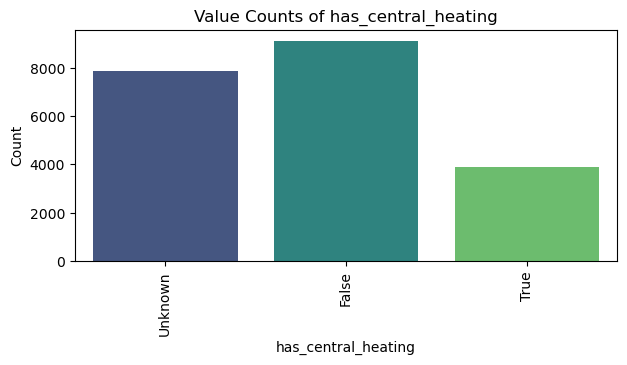

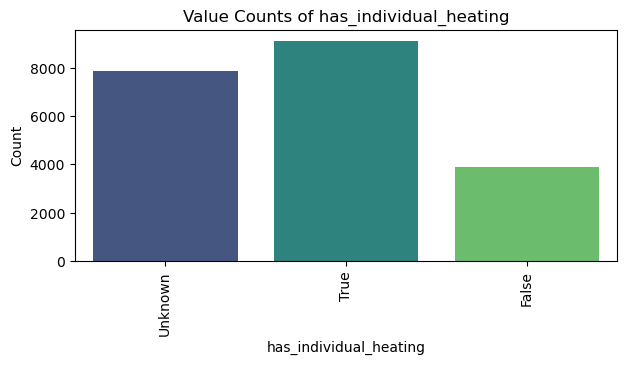

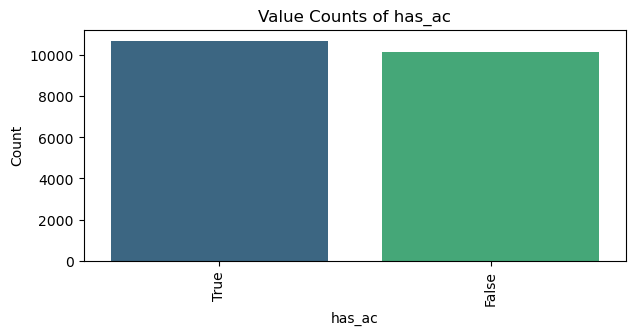

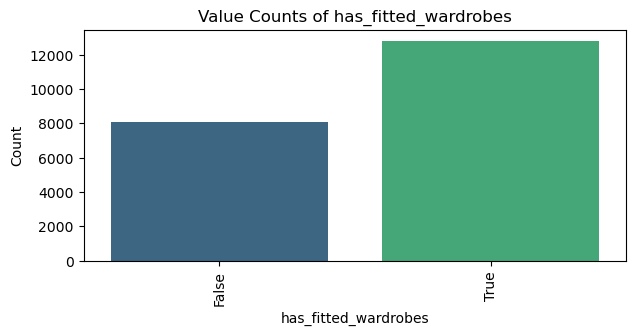

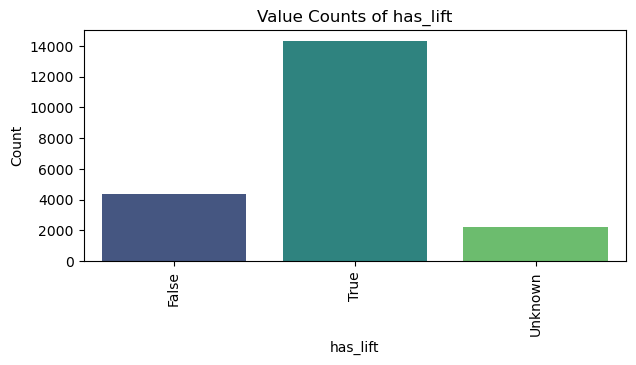

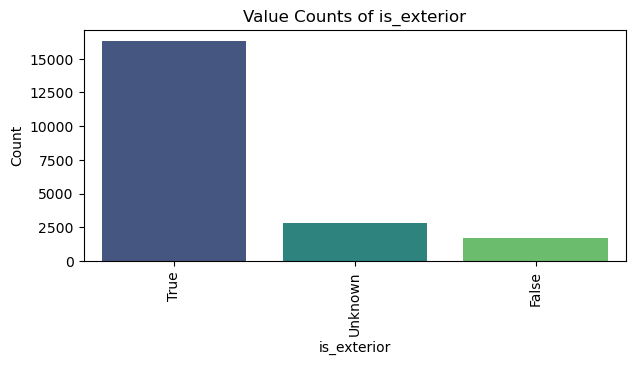

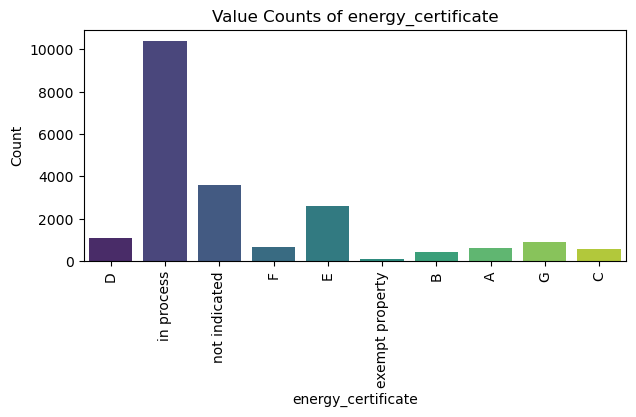

In [225]:
# Visualizations for categorical columns
# List of categorical columns for which to create bar plots
categorical_columns = ['has_central_heating', 'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift', 'is_exterior',
                       'energy_certificate']

# Create bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(7, 3))
    sns.countplot(data=data_cleaned, x=column, palette='viridis')
    plt.title(f'Value Counts of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


In [237]:
categorical_columns = ['has_central_heating', 'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'energy_certificate', 'has_parking']
# Convert all categorical variables to dummy variables
data_cleaned_encoded = pd.get_dummies(data_cleaned[categorical_columns], drop_first=True)

data_cleaned_encoded.shape

(20869, 20)

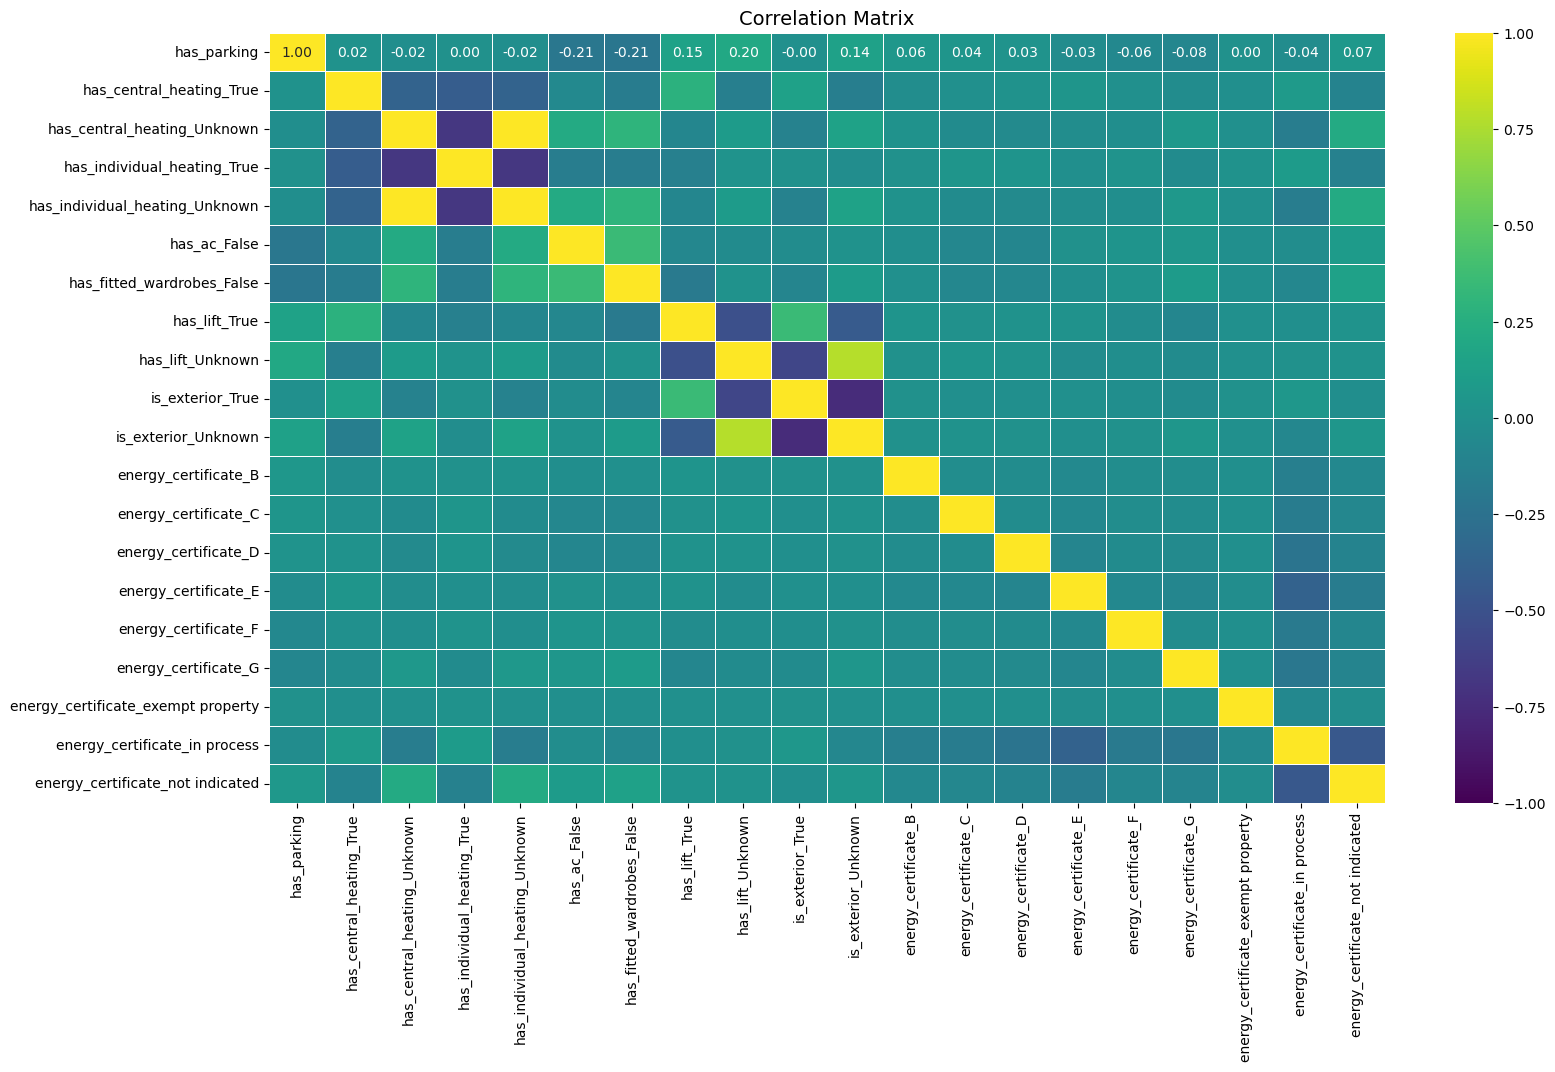

In [239]:
correlation_matrix = data_cleaned_encoded.corr()

plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()